In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [3]:
root = 'C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset/'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
model = CSRNet()

In [7]:
model = model.cuda()

In [9]:
checkpoint = torch.load('0model_best.pth.tar')

In [10]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [14]:
mae = 0
for i in range(len(img_paths)):
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img[0,:,:]=img[0,:,:]-92.8207477031
    img[1,:,:]=img[1,:,:]-95.2757037428
    img[2,:,:]=img[2,:,:]-104.877445883
    img = img.cuda()
    #img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print(i,mae)
print(mae/len(img_paths))

0 309.8692321777344
1 962.0317077636719
2 2203.562469482422
3 2358.526397705078
4 4161.976837158203
5 5367.977935791016
6 10840.658599853516
7 11068.30078125
8 25771.779296875
9 26024.679275512695
10 26859.797927856445
11 28320.39582824707
12 30107.693557739258
13 35322.68525695801
14 35806.16899108887
15 36123.27995300293
16 36804.33610534668
17 37467.70170593262
18 46152.82182312012
19 47126.57652282715
20 60164.11167907715
21 60669.79685974121
22 61080.11454772949
23 62677.40800476074
24 62694.52186584473
25 68603.83876037598
26 71225.89637756348
27 72503.36280822754
28 73016.60768127441
29 74709.80787658691
30 74964.68367004395
31 75104.98976135254
32 76494.38331604004
33 78195.73316955566
34 81979.57203674316
35 82515.59870910645
36 86031.17390441895
37 87511.07258605957
38 88346.12483215332
39 89107.81843566895
40 89268.19631958008
41 89789.40127563477
42 93690.47525024414
43 94676.16323852539
44 94843.07849121094
45 96275.78186035156
46 97141.92767333984
47 98263.60052490234
48 

Predicted Count :  18


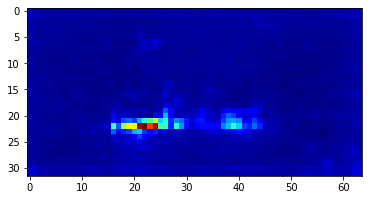

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'part_A/test_data/ground-truth/IMG_100.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [19]:
from matplotlib import cm as c
img = transform(Image.open('dataset/part_A_final/train_data/images/IMG_301.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('part_A/test_data/ground-truth/IMG_100.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('part_A/test_data/images/IMG_100.jpg'))
plt.show()